# 01 - EDA & Cleaning

**Đề tài:** Phân tích và trực quan hóa dữ liệu tuyển dụng CNTT ở Việt Nam

## Mục tiêu:
- Khảo sát dữ liệu thô `Data_Jobs.csv`
- Làm sạch và chuẩn hóa dữ liệu
- **Lọc dữ liệu theo phạm vi:** Chỉ giữ lại dữ liệu việc làm tại Việt Nam (HANOI, HCMC, VIETNAM, REMOTE)
- Loại bỏ dữ liệu không phù hợp (PHILIPPINES, UNKNOWN)
- Ghi lại các quyết định xử lý và ảnh hưởng
- Xuất `Data_Jobs_Clean.csv` để dùng cho phân tích tiếp theo

## Phạm vi nghiên cứu:
- **Thị trường:** Việt Nam
- **Ngành:** CNTT (Data Science, Data Engineering, Data Analysis, Business Intelligence)
- **Địa điểm:** Hà Nội, TP.HCM, Việt Nam, Remote


In [1]:
# khảo sát dữ liệu việc làm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

RAW_PATH = r"D:\Truc_quan\Data_Jobs.csv"
CLEAN_PATH = r"D:\Truc_quan\Data_Jobs_Clean.csv"

# Kiểm tra file tồn tại
assert os.path.exists(RAW_PATH), f"Không tìm thấy file: {RAW_PATH}"

# Đọc dữ liệu thô
raw_df = pd.read_csv(RAW_PATH, encoding="latin1")
raw_df.head()


,Job_ID,Job_Title,Min_YOE,Est_Salary,JD_Trans,L1,L2,L3,L4,MinL,Location,VN,Remote,W_Term,W_Term_2,W_Term_3,W_Term_4,Data_Engineer,Data_Analyst,Data_Scientist,Business_Analyst,Business_Intelligence,Combined_role,Others
0,5603,Senior Machine Learning,3.0,3390.0,Lang Ha Earable recruits Senior ML from 3 ++ y...,2.0,NaN,NaN,NaN,2,HN,1,0,Fulltime,NaN,NaN,NaN,1,0,1,0,0,1,0
1,5602,Data Engineer,1.0,1270.0,HN-LLLL; Product Company recruits #data #engin...,1.0,2,NaN,NaN,1,HN,1,0,Fulltime,NaN,NaN,NaN,1,0,0,0,0,0,0
2,5601,AI Research Engineer,3.0,2755.0,Cau Giay - HN - AI Research Engineer - 3-7year...,2.0,NaN,NaN,NaN,2,HN,1,0,Fulltime,NaN,NaN,NaN,1,0,1,0,0,1,0
3,5600,Data Analyst,3.0,1270.0,Over 3 years of experience in data analysis.,2.0,NaN,NaN,NaN,2,HN,1,0,Fulltime,NaN,NaN,NaN,0,1,0,0,0,0,0
4,5599,Data Engineer,2.0,1800.0,From 2 years of experience that has been worki...,1.0,NaN,NaN,NaN,1,HN,1,0,Fulltime,NaN,NaN,NaN,1,0,0,0,0,0,0


In [2]:
# Tự động dùng dữ liệu sạch nếu đã có
USE_CLEAN = os.path.exists(CLEAN_PATH)
if USE_CLEAN:
    print("Phát hiện Data_Jobs_Clean.csv. Sử dụng dữ liệu sạch, bỏ qua bước làm sạch.")
    df = pd.read_csv(CLEAN_PATH, encoding='utf-8')
else:
    print("Chưa có dữ liệu sạch. Sẽ tiến hành làm sạch từ dữ liệu thô.")


Phát hiện Data_Jobs_Clean.csv. Sử dụng dữ liệu sạch, bỏ qua bước làm sạch.


In [3]:
# Tổng quan dữ liệu
raw_shape = raw_df.shape
raw_info = raw_df.info()
raw_desc = raw_df.describe(include='all')
print("Kích thước dữ liệu thô:", raw_shape)
raw_df.isna().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3187 entries, 0 to 3186
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_ID                 3187 non-null   int64  
 1   Job_Title              3187 non-null   object 
 2   Min_YOE                2567 non-null   float64
 3   Est_Salary             3041 non-null   float64
 4   JD_Trans               3187 non-null   object 
 5   L1                     3173 non-null   float64
 6   L2                     1441 non-null   object 
 7   L3                     32 non-null     float64
 8   L4                     1 non-null      float64
 9   MinL                   3187 non-null   int64  
 10  Location               3174 non-null   object 
 11  VN                     3187 non-null   int64  
 12  Remote                 3187 non-null   int64  
 13  W_Term                 3187 non-null   object 
 14  W_Term_2               326 non-null    object 
 15  W_Te

L4                       3186
W_Term_4                 3185
W_Term_3                 3165
L3                       3155
W_Term_2                 2861
L2                       1746
Min_YOE                   620
Est_Salary                146
L1                         14
Location                   13
Combined_role               0
Data_Engineer               0
Business_Intelligence       0
Business_Analyst            0
Data_Scientist              0
Data_Analyst                0
Job_ID                      0
Remote                      0
W_Term                      0
Job_Title                   0
dtype: int64

In [4]:
# Làm sạch dữ liệu (theo logic từ Clean_data.py)
df = raw_df.copy()

# 1) Xóa trùng lặp
subset_cols = [col for col in ["Job_ID", "Job_Title", "JD_Trans"] if col in df.columns]
if subset_cols:
    df = df.drop_duplicates(subset=subset_cols)
print("Sau khi xóa trùng:", df.shape)

# 2) Xử lý thiếu
num_cols = [col for col in ["Min_YOE", "Est_Salary"] if col in df.columns]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

text_cols = df.select_dtypes(include="object").columns
df[text_cols] = df[text_cols].fillna("Unknown")

role_cols = ["Data_Engineer","Data_Analyst","Data_Scientist",
             "Business_Analyst","Business_Intelligence",
             "Combined_role","Others"]
for col in role_cols:
    if col not in df.columns:
        df[col] = 0

df[role_cols] = df[role_cols].fillna(0).astype(int)

# 3) Chuẩn hóa
if "Job_Title" in df.columns:
    df["Job_Title"] = df["Job_Title"].str.strip().str.title()

if "Location" in df.columns:
    df["Location"] = df["Location"].str.strip().str.upper()
    location_map = {"HN":"HANOI","HA NOI":"HANOI","HÀ NỘI":"HANOI",
                    "HCM":"HCMC","HO CHI MINH":"HCMC","TPHCM":"HCMC","TP. HCM":"HCMC",
                    "VIETNAM":"VIETNAM","VN":"VIETNAM","VN*":"VIETNAM","VN ( HN":"VIETNAM",
                    "REMOTE":"REMOTE"}
    df["Location"] = df["Location"].replace(location_map)
    valid_locations = ["HANOI","HCMC","VIETNAM","REMOTE"]
    df.loc[~df["Location"].isin(valid_locations), "Location"] = "UNKNOWN"
    
    # ===== Loại bỏ dữ liệu PHILIPPINES và UNKNOWN =====
    print(f"Trước khi lọc Location: {df.shape[0]} dòng")
    df = df[df["Location"].isin(valid_locations)]
    print(f"Sau khi loại bỏ PHILIPPINES & UNKNOWN: {df.shape[0]} dòng")

# Min_YOE
if "Min_YOE" in df.columns:
    df["Min_YOE"] = df["Min_YOE"].round().astype(int)
    df = df[df["Min_YOE"] >= 0]

# Outlier lương bằng z-score
if "Est_Salary" in df.columns:
    z_scores = (df["Est_Salary"] - df["Est_Salary"].mean()) / df["Est_Salary"].std()
    df = df[np.abs(z_scores) <= 3]

# 4) Toàn vẹn
if "Job_Title" in df.columns:
    df.loc[df["Job_Title"].str.contains("Data Engineer", case=False, na=False), "Data_Engineer"] = 1
    df.loc[df["Job_Title"].str.contains("Data Analyst", case=False, na=False), "Data_Analyst"] = 1
    df.loc[df["Job_Title"].str.contains("Data Scientist", case=False, na=False), "Data_Scientist"] = 1
    df.loc[df["Job_Title"].str.contains("Business Analyst", case=False, na=False), "Business_Analyst"] = 1

# Ít nhất một role
df["Role_Sum"] = df[role_cols].sum(axis=1)
df.loc[df["Role_Sum"] == 0, "Others"] = 1
df.drop(columns="Role_Sum", inplace=True)

# Job_ID duy nhất
if "Job_ID" in df.columns:
    df = df.drop_duplicates(subset=["Job_ID"]) 

# 5) Last_Updated
from datetime import date
df["Last_Updated"] = date.today().strftime("%Y-%m-%d")

print("Kích thước sau làm sạch:", df.shape)
df.head()


Sau khi xóa trùng: (3187, 24)
Trước khi lọc Location: 3187 dòng
Sau khi loại bỏ PHILIPPINES & UNKNOWN: 3010 dòng
Kích thước sau làm sạch: (2954, 25)


,Job_ID,Job_Title,Min_YOE,Est_Salary,JD_Trans,L1,L2,L3,L4,MinL,Location,VN,Remote,W_Term,W_Term_2,W_Term_3,W_Term_4,Data_Engineer,Data_Analyst,Data_Scientist,Business_Analyst,Business_Intelligence,Combined_role,Others,Last_Updated
0,5603,Senior Machine Learning,3,3390.0,Lang Ha Earable recruits Senior ML from 3 ++ y...,2.0,Unknown,NaN,NaN,2,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,1,0,1,0,0,1,0,2025-11-10
1,5602,Data Engineer,1,1270.0,HN-LLLL; Product Company recruits #data #engin...,1.0,2,NaN,NaN,1,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,1,0,0,0,0,0,0,2025-11-10
2,5601,Ai Research Engineer,3,2755.0,Cau Giay - HN - AI Research Engineer - 3-7year...,2.0,Unknown,NaN,NaN,2,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,1,0,1,0,0,1,0,2025-11-10
3,5600,Data Analyst,3,1270.0,Over 3 years of experience in data analysis.,2.0,Unknown,NaN,NaN,2,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,0,1,0,0,0,0,0,2025-11-10
4,5599,Data Engineer,2,1800.0,From 2 years of experience that has been worki...,1.0,Unknown,NaN,NaN,1,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,1,0,0,0,0,0,0,2025-11-10


In [5]:
# Nếu đã có dữ liệu sạch, nạp lại để dùng cho các bước sau
if USE_CLEAN:
    df = pd.read_csv(CLEAN_PATH, encoding='utf-8')
    print("Đã nạp lại dữ liệu sạch để dùng cho các bước sau.")


Đã nạp lại dữ liệu sạch để dùng cho các bước sau.


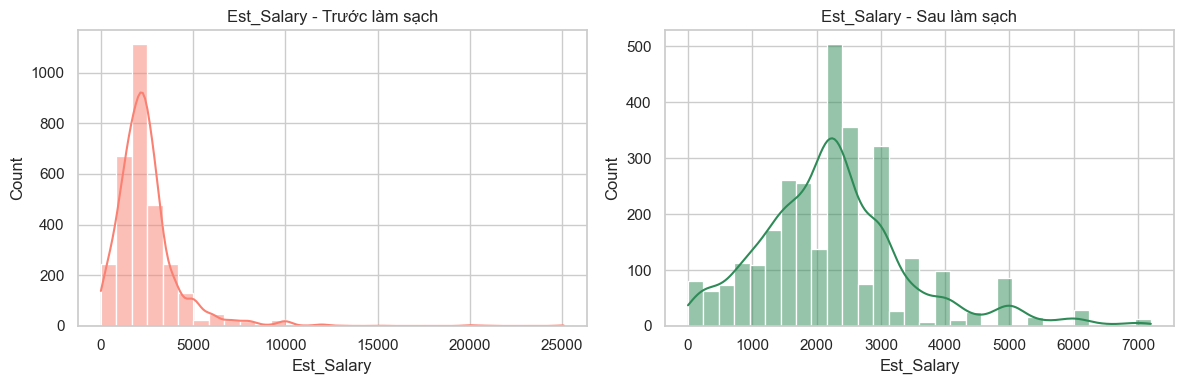

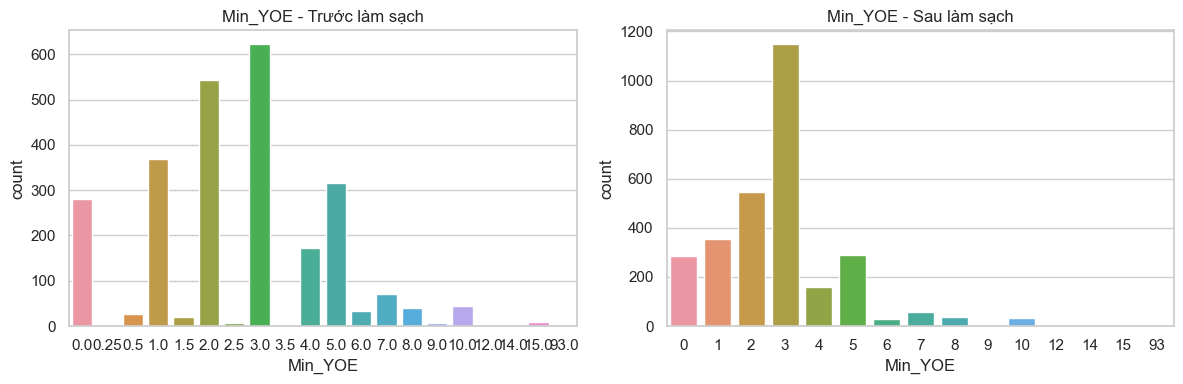

In [6]:
# So sánh phân bố trước/sau làm sạch
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(raw_df['Est_Salary'], bins=30, kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Est_Salary - Trước làm sạch')
sns.histplot(df['Est_Salary'], bins=30, kde=True, ax=axes[1], color='seagreen')
axes[1].set_title('Est_Salary - Sau làm sạch')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x='Min_YOE', data=raw_df, ax=axes[0])
axes[0].set_title('Min_YOE - Trước làm sạch')
sns.countplot(x='Min_YOE', data=df, ax=axes[1])
axes[1].set_title('Min_YOE - Sau làm sạch')
plt.tight_layout()
plt.show()


In [7]:
# Xuất dữ liệu sạch
(df
 .to_csv(CLEAN_PATH, index=False, encoding='utf-8-sig')
)
print(f"Đã lưu dữ liệu sạch tại: {CLEAN_PATH}")


Đã lưu dữ liệu sạch tại: D:\Truc_quan\Data_Jobs_Clean.csv
